<a href="https://colab.research.google.com/github/mayarachew/20_news_groups/blob/master/20_news_groups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Dataset
from sklearn.datasets import fetch_20newsgroups

from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

# Vectorizing and spliting
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Classifications
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Preprocessing
import re, string
import nltk
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 

# Clustering
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

# Visualization
import plotly.graph_objects as go
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE

# Functions

Function to plot Confusion Matrix

In [ ]:
def plotConfusionMatrix(classifier, X_test, y_test, y_pred, class_names):
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    disp = plot_confusion_matrix(classifier, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues)
        
    print()
    print('Confusion matrix')
    print(disp.confusion_matrix)

    print()
    plt.show()
    return;

Function to create classifier

In [ ]:
def createClassifier(classifier, X_train, y_train, X_test, y_test):
    # Create a classifier using train data
    classifier.fit(X_train, y_train)

    # Predict labels using test data
    y_true, y_pred = y_test, classifier.predict(X_test)

    # Print a text report showing the main classification metrics
    print('Classification report: ')
    print(classification_report(y_true, y_pred, zero_division=0))

    # Print Confusion Matrix
    print('Confusion matrix: ')
    print(confusion_matrix(y_true, y_pred))
    return y_pred;

Functions to Plot Figure

In [ ]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def formatColor(color):
    return 'rgb('+str(int(color[0]*255))+','+str(int(color[1]*255))+','+str(int(color[2]*255))+')'
    
def plotFigure(data, labels):
    # Define unique colors to each label
    numColors = len(np.unique(labels))
    cmap = get_cmap(numColors+1)
    colorList = [cmap(i) for i in range(1, numColors+1)]

    traceArr = []
    mapPoints = []
    labelArray = np.unique(labels)

    for lab, col in zip(labelArray, colorList):
        # Plot each point
        mapPoints.extend(np.where(labels==lab))

        trace = go.Scatter(
            x=data[labels==lab, 0],
            y=data[labels==lab, 1],
            mode='markers',
            name = str(lab),
            marker=dict(
                size=8,
                color=formatColor(col),
                opacity=0.8
            ),
        )

        traceArr.append(trace)

    # Create figure
    fig = go.FigureWidget(data=traceArr, layout=go.Layout(
            margin=dict(l=0, r=0, b=0, t=0)
        ))
     
    return fig

Function to find best parameters by cross-validation

In [ ]:
def best_parameters(search_type, classifier, all_parameters):
  tuned_parameters = all_parameters

  scores = ['f1']
  clf = []

  for score in scores:
      print("Tuning hyper-parameters for %s" % score)
      print()

      print("Best parameters set found on development set:")
      print()

      if classifier == SVC:
          clf = search_type(SVC(), tuned_parameters, scoring='%s_macro' % score) 
          clf.fit(X_train, y_train)
          print(clf.best_params_)
          print()
          print("Detailed classification report:")
          y_true, y_pred = y_test, clf.predict(X_test)
          print(classification_report(y_true, y_pred))
          return clf.best_params_;
      elif classifier == MLPClassifier:
          clf = search_type(MLPClassifier(), all_parameters, scoring='%s_macro' % score, n_jobs=-1, cv=5)
          clf.fit(X_train, y_train)
          print(clf.best_params_)
          print()
          print("Detailed classification report:")
          y_true, y_pred = y_test, clf.predict(X_test)
          print(classification_report(y_true, y_pred))
          return clf.best_params_;

Visualized prediction - Clustering

In [ ]:
def visualize_prediction(X, name_1, name_2, name_3, clus_1, clus_2, clus_3, label_1, label_2, label_3, title):
  colors = ['#FF6666', '#FF9933', '#FFFF66', '#FF99CC', '#99FF33', '#99FFCC', '#3399FF']

  fig = plt.figure(figsize=(17, 5.5))
  fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
  fig.suptitle(title, fontsize=15)

  # Clustering 1
  ax = fig.add_subplot(1, 3, 1)
  for k, col in zip(range(n_clusters), colors):
      my_members = label_1 == k
      cluster_center = clus_1.cluster_centers_[k]
      ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='o')
      ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
              markeredgecolor='k', markersize=6)
      ax.set_title(name_1)

  # Clustering 2
  ax = fig.add_subplot(1, 3, 2)
  for k, col in zip(range(n_clusters), colors):
      my_members = label_2 == k
      ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='o')
      ax.set_title(name_2)

  # Clustering 3
  ax = fig.add_subplot(1, 3, 3)
  for k, col in zip(range(n_clusters), colors):
      my_members = label_3 == k
      ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='o')
      ax.set_title(name_3)

# Read files

In [ ]:
# Define 7 news groups
newsgroups = ['alt.atheism', 'comp.sys.mac.hardware', 'comp.windows.x',
 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med']

# Read 20 news groups folders of the 20newsgroups dataset
newsgroups = fetch_20newsgroups(subset='train', categories=newsgroups)

pprint(list(newsgroups.target_names))

pprint(np.unique(newsgroups.target))

['alt.atheism',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med']
array([0, 1, 2, 3, 4, 5, 6])


# Preprocessing

In [ ]:
# Convert to lower case
newsgroups_pp = [text.lower() for text in newsgroups.data]

# Strip all punctuation
table = str.maketrans('', '', string.punctuation)
newsgroups_pp = [text.translate(table) for text in newsgroups_pp]

# Convert all numbers to the word 'num'
newsgroups_pp = [re.sub(r'\d+', 'num', text) for text in newsgroups_pp]

# Convert text to tokens
nltk.download('punkt')
newsgroups_pp = [nltk.word_tokenize(text) for text in newsgroups_pp]

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))
newsgroups_pp = [[word for word in text if word not in stop_words] for text in newsgroups_pp]

# Stemming
newsgroups_pp = [[LancasterStemmer().stem(word) for word in text] for text in newsgroups_pp]

# Lemmatizing
nltk.download('wordnet')
newsgroups_pp = [[WordNetLemmatizer().lemmatize(word, 'n') for word in text] for text in newsgroups_pp]

# Convert token back to text
newsgroups_pp = [TreebankWordDetokenizer().detokenize(text) for text in newsgroups_pp]

print(newsgroups.data[0])
print(newsgroups_pp[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
From: homer@tripos.com (Webster Homer)
Subject: Mind Machines?
Summary: Do mind machines work?
Keywords: mind sleep Light&Sound
Organization: Tripos Associates, Inc.
Lines: 19

I recently learned about these devices that supposedly induce specific 
brain wave frequencies in their users simply by wearing them. Mind machines
consist of LED gogles, head phones, and a microprocessor that controls them.
They strobe the (closed) eye and send sound pulses in sync with the flashing
LEDs. I understand that these devices are experimental, but they are available.
I've heard claims that they can induce sleep, and light trance states for
relaxation. Essentiall

# Convert data into vectors

In [ ]:
# Convert data into a matrix of TF-IDF features
vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english', max_df=0.95, min_df=4)

# tfidf
tfidf = vectorizer.fit_transform(newsgroups.data)

# pre process tfidf
tfidf_pp = vectorizer.fit_transform(newsgroups_pp)

print(tfidf.shape)
print(tfidf_pp.shape)

(4031, 14782)
(4031, 8788)



# Split dataset

In [ ]:
X = tfidf;
X_pp = tfidf_pp;
y = newsgroups.target;

Split dataset into training and test sets, using KFold

In [ ]:
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

for train_index, test_index in kf.split(X):
    print("PRE PROC TRAIN:", train_index, "PRE PRO TEST:", test_index)
    pre_proc_X_train, pre_proc_X_test = pre_proc_X[train_index], pre_proc_X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 807  808  809 ... 4028 4029 4030] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

Split dataset into training and test sets, using StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

for train_index, test_index in skf.split(X, y):
    print("PRE PROC TRAIN:", train_index, "PRE PRO TEST:", test_index)
    pre_proc_X_train, pre_proc_X_test = pre_proc_X[train_index], pre_proc_X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 713  720  724 ... 4028 4029 4030] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

# Find best parameters

Support Vector Machine

In [ ]:
all_parameters = [{'kernel': ['rbf'], 'gamma': [1, 2, 0.5, 0.25, 0.1, 1e-2, 1e-3, 1e-4],
                  'C': [0.5,1, 1.5, 2, 2.5, 5, 7.5, 10, 12.5, 100, 1000]},
                  {'kernel': ['linear'], 'C': [0.5,1, 1.5, 2, 2.5, 5, 7.5, 10, 12.5, 100, 1000]}]

# Find best params using GridSearch
grid_params = best_parameters(SVC, GridSearchCV, all_parameters)

# Find best params using RandomizedSearch
rand_params = best_parameters(SVC, RandomizedSearchCV, all_parameters)


Tuning hyper-parameters for f1

Best parameters set found on development set:

Tuning hyper-parameters for f1

Best parameters set found on development set:



ANN Multilayer Perceptron

In [ ]:
all_parameters = {'hidden_layer_sizes': [(10,30,10),(20,)],
                  'activation': ['tanh', 'relu'],
                  'solver': ['sgd', 'adam'],
                  'alpha': [0.0001, 0.05],
                  'learning_rate': ['constant','adaptive']}

# Find best params using GridSearch
grid_params = best_parameters(GridSearchCV, MLPClassifier, all_parameters)

# Find best params using RandomizedSearch
rand_params = best_parameters(RandomizedSearchCV, MLPClassifier, all_parameters)

Tuning hyper-parameters for f1

Best parameters set found on development set:



KeyboardInterrupt: ignored

# Define classifiers

Support Vector Machine

Without preprocessing
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        96
           1       0.95      0.90      0.92       116
           2       0.97      0.96      0.96       119
           3       1.00      0.97      0.99       120
           4       1.00      0.97      0.99       119
           5       0.85      0.97      0.91       118
           6       0.98      0.96      0.97       118

    accuracy                           0.96       806
   macro avg       0.96      0.96      0.96       806
weighted avg       0.96      0.96      0.96       806

Confusion matrix: 
[[ 95   0   0   0   0   0   1]
 [  0 104   2   0   0  10   0]
 [  0   0 114   0   0   5   0]
 [  0   0   0 117   0   3   0]
 [  0   0   1   0 116   1   1]
 [  0   2   1   0   0 115   0]
 [  0   3   0   0   0   2 113]]

Confusion matrix
[[ 95   0   0   0   0   0   1]
 [  0 104   2   0   0  10   0]
 [  0   0 114   0   0   5   0]
 [  0   0

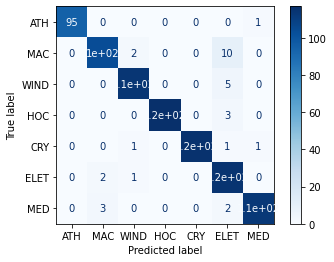

With preprocessing
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.95      0.91      0.93       116
           2       0.96      0.94      0.95       119
           3       1.00      0.97      0.99       120
           4       1.00      0.97      0.98       119
           5       0.86      0.97      0.91       118
           6       0.98      0.97      0.98       118

    accuracy                           0.96       806
   macro avg       0.96      0.96      0.96       806
weighted avg       0.96      0.96      0.96       806

Confusion matrix: 
[[ 96   0   0   0   0   0   0]
 [  0 106   3   0   0   7   0]
 [  0   0 112   0   0   6   1]
 [  0   2   0 117   0   1   0]
 [  0   0   1   0 115   2   1]
 [  0   3   1   0   0 114   0]
 [  0   0   0   0   0   3 115]]

Confusion matrix
[[ 96   0   0   0   0   0   0]
 [  0 106   3   0   0   7   0]
 [  0   0 112   0   0   6   1]
 [  0   2   

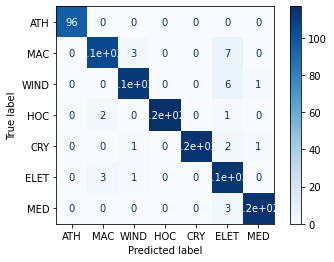

In [ ]:
# Create classifier
svm_clf = SVC(C=2, gamma=0.5, kernel='rbf')

print('Without preprocessing')
y_pred = createClassifier(svm_clf, X_train, y_train, X_test, y_test)
plotConfusionMatrix(svm_clf, X_test, y_test, y_pred, ['ATH', 'MAC', 'WIND', 'HOC', 'CRY', 'ELET', 'MED'])

print('With preprocessing')
y_pred = createClassifier(svm_clf, pre_proc_X_train, y_train, pre_proc_X_test, y_test)
plotConfusionMatrix(svm_clf, pre_proc_X_test, y_test, y_pred, ['ATH', 'MAC', 'WIND', 'HOC', 'CRY', 'ELET', 'MED'])

Classification by means of Artificial Neural Network: Feed-forward Backpropagation Multilayer Perceptron

Without preprocessing
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.95      0.91      0.93       116
           2       0.96      0.97      0.96       119
           3       1.00      0.98      0.99       120
           4       0.97      0.98      0.98       119
           5       0.92      0.97      0.94       118
           6       0.97      0.97      0.97       118

    accuracy                           0.97       806
   macro avg       0.97      0.97      0.97       806
weighted avg       0.97      0.97      0.97       806

Confusion matrix: 
[[ 96   0   0   0   0   0   0]
 [  0 106   3   0   0   6   1]
 [  0   0 115   0   2   2   0]
 [  0   1   1 118   0   0   0]
 [  0   0   1   0 117   0   1]
 [  0   2   0   0   1 114   1]
 [  0   2   0   0   0   2 114]]

Confusion matrix
[[ 96   0   0   0   0   0   0]
 [  0 106   3   0   0   6   1]
 [  0   0 115   0   2   2   0]
 [  0   1

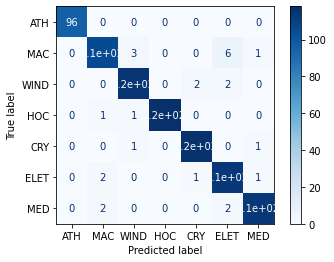

With preprocessing
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.92      0.91      0.92       116
           2       0.97      0.96      0.97       119
           3       1.00      0.98      0.99       120
           4       0.99      0.99      0.99       119
           5       0.90      0.94      0.92       118
           6       0.99      0.98      0.99       118

    accuracy                           0.97       806
   macro avg       0.97      0.97      0.97       806
weighted avg       0.97      0.97      0.97       806

Confusion matrix: 
[[ 96   0   0   0   0   0   0]
 [  0 106   2   0   0   8   0]
 [  0   1 114   0   0   4   0]
 [  0   1   1 118   0   0   0]
 [  0   1   0   0 118   0   0]
 [  0   5   0   0   1 111   1]
 [  0   1   0   0   0   1 116]]

Confusion matrix
[[ 96   0   0   0   0   0   0]
 [  0 106   2   0   0   8   0]
 [  0   1 114   0   0   4   0]
 [  0   1   

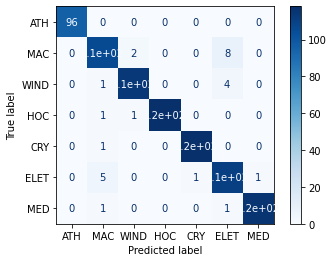

In [ ]:
# Create classifier
mlp_clf = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=(20,), learning_rate='adaptive', solver='adam')

print('Without preprocessing')
y_pred = createClassifier(mlp_clf, X_train, y_train, X_test, y_test)
plotConfusionMatrix(mlp_clf, X_test, y_test, y_pred, ['ATH', 'MAC', 'WIND', 'HOC', 'CRY', 'ELET', 'MED'])

print('With preprocessing')
y_pred = createClassifier(mlp_clf, pre_proc_X_train, y_train, pre_proc_X_test, y_test)
plotConfusionMatrix(mlp_clf, pre_proc_X_test, y_test, y_pred, ['ATH', 'MAC', 'WIND', 'HOC', 'CRY', 'ELET', 'MED'])

# Clustering

In [ ]:
# Dimensionality reduction using truncated SVD
not_sparse_tfidf_pp = TruncatedSVD(n_components=2, n_iter=7).fit_transform(tfidf_pp)
not_sparse_tfidf = TruncatedSVD(n_components=2, n_iter=7).fit_transform(tfidf)

# Principal component analysis
pca_tfidf_pp = PCA(n_components=2).fit_transform(not_sparse_tfidf_pp)  
pca_tfidf = PCA(n_components=2).fit_transform(not_sparse_tfidf)  

Define Clustering

In [ ]:
X = pca_tfidf
X_pp = pca_pre_proc_tfidf
n_clusters = 7

# K-means ----------------------------------------------------------------------
# With preprocessing
k_means_pp = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, 
                    n_init=1).fit(X_pp)

# Without preprocessing
k_means = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, 
                 n_init=1).fit(X)

# Gaussian Mixture -------------------------------------------------------------
# With preprocessing
gauss_mix_pp = GaussianMixture(n_components=n_clusters).fit(X_pp)

# Without preprocessing
gauss_mix = GaussianMixture(n_components=n_clusters).fit(X)

# Spectral Clustering ----------------------------------------------------------
# With preprocessing
spect_clus_pp = SpectralClustering(n_clusters=n_clusters, 
                                   assign_labels="discretize", 
                                   random_state=0).fit(X_pp)

# Without preprocessing
spect_clus = SpectralClustering(n_clusters=n_clusters, 
                                assign_labels="discretize", 
                                random_state=0).fit(X)

Compare Clustering

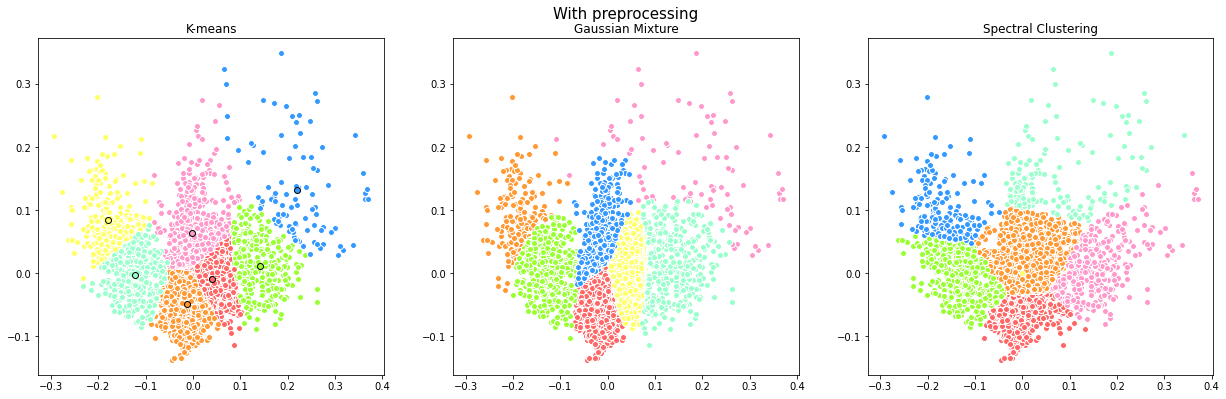

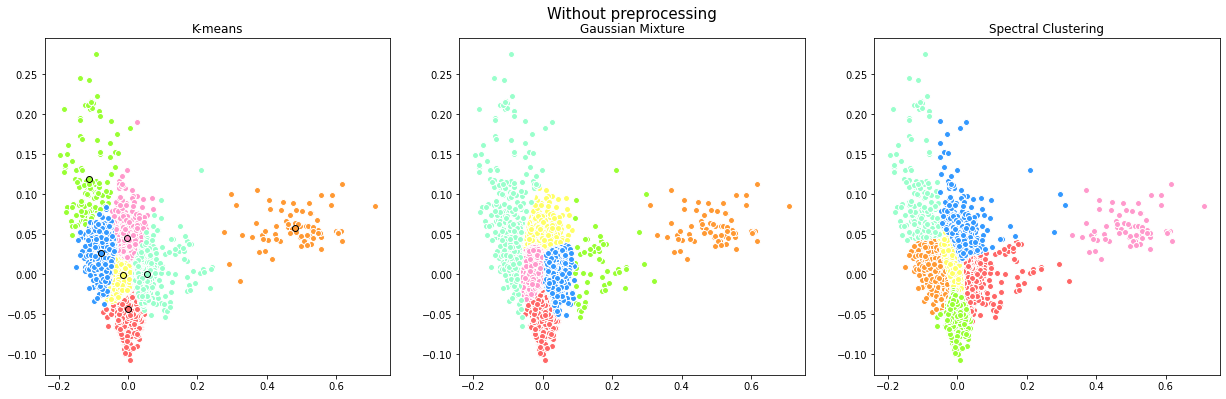

In [ ]:
# With preprocessing -----------------------------------------------------------
# Define labels
k_means_pp_labels = pairwise_distances_argmin(X_pp, k_means_pp.cluster_centers_)
gauss_mix_pp_labels = gauss_mix_pp.predict(X_pp)
spect_clus_pp_labels = spect_clus_pp.labels_

# Visualize prediction (K-means, Gaussian Mixture, Spectral Clustering)
visualize_prediction(X_pp, 'K-means', 'Gaussian Mixture', 'Spectral Clustering', 
                     k_means_pp, gauss_mix_pp, spect_clus_pp, 
                     k_means_pp_labels, gauss_mix_pp_labels, spect_clus_pp_labels, 
                     'With preprocessing')

# Without preprocessing --------------------------------------------------------
# Define labels
k_means_labels = pairwise_distances_argmin(X, k_means.cluster_centers_)
gauss_mix_labels = gauss_mix.predict(X)
spect_clus_labels = spect_clus.labels_

# Visualize prediction (K-means, Gaussian Mixture, Spectral Clustering)
visualize_prediction(X, 'K-means', 'Gaussian Mixture', 'Spectral Clustering', 
                     k_means, gauss_mix, spect_clus, 
                     k_means_labels, gauss_mix_labels, spect_clus_labels, 
                     'Without preprocessing')

# Visualization

Principal Component Analysis (PCA)

In [ ]:
# Dimensionality reduction using truncated SVD
not_sparse_tfidf = TruncatedSVD(n_components=2, n_iter=7).fit_transform(tfidf)

# Principal component analysis
pca_tfidf = PCA(n_components=2).fit_transform(not_sparse_tfidf)  

# Plot Figure
fig = plotFigure(pca_tfidf, newsgroups.target)
print('Principal Component Analysis (PCA)')
fig.show()

Principal Component Analysis (PCA)


Multidimensional scaling (MDS)

In [ ]:
# Multidimensional scaling (respect well the distances)
mds_tfidf = MDS(n_components=2).fit_transform(tfidf.toarray())

# Plot Figure
fig = plotFigure(mds_tfidf, newsgroups.target)
print('Multidimensional scaling (MDS)')
fig.show()

Multidimensional scaling (MDS)


T-distributed Stochastic Neighbor Embedding

In [ ]:
# T-distributed Stochastic Neighbor Embedding
tsne_tfidf = TSNE(n_components=2).fit_transform(tfidf)

# Plot Figure
fig = plotFigure(tsne_tfidf, newsgroups.target)
print('T-distributed Stochastic Neighbor Embedding (TSNE)')
fig.show()

T-distributed Stochastic Neighbor Embedding (TSNE)
